In [39]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
red_wine = pd.read_csv("data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("data/winequality-white.csv", sep=";")


red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
red_wine['color'] = "RED"
white_wine['color'] = "WHITE"

wine = pd.concat([red_wine, white_wine])

wine.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,WHITE
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,WHITE
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,WHITE
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,WHITE
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,WHITE


Şarabın rengini tahmin etmek için bir model oluşturacağımızdan y'e rengi dahil edeceğiz.


In [41]:
X = wine.drop(columns=['color'])
y = wine['color'].map({'RED': 0, 'WHITE': 1})  
y.tail()

4893    1
4894    1
4895    1
4896    1
4897    1
Name: color, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## SVM 
Sınıflar arasında iki nokta belirleyip (support vectors) bunu her sınıf için yaparak bu support vectorler için vectorlerin uzaklıkları toplamı en fazla olacak şekilde bir margin classifier oluşturmaya yarayan algoritmadır. margin calssifierin iki support vectore olan uzaklıkları toplamı maximum olmalıdır.

In [44]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")


[[335   6]
 [  1 958]]
0.9937759336099585
0.9989572471324296
0.9963598543941757
Accuracy score: 0.9946153846153846


## Naive Bayes
Naive bayes teorisi 

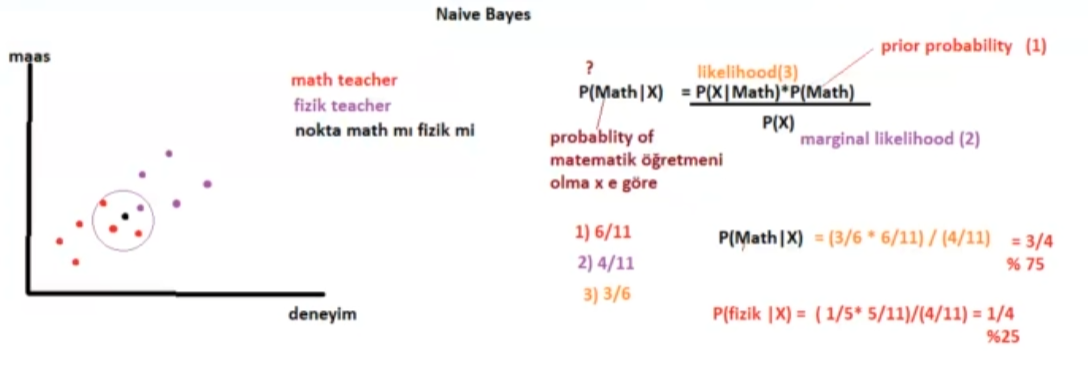

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

[[329  12]
 [ 26 933]]
0.9873015873015873
0.97288842544317
0.9800420168067226
Accuracy score: 0.9707692307692307


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_scaled,y_train)
y_pred=tree.predict(X_test_scaled)


print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

[[333   8]
 [ 15 944]]
0.9915966386554622
0.9843587069864442
0.9879644165358451
Accuracy score: 0.9823076923076923


## Logistic REgression

In [47]:
from sklearn.linear_model import LogisticRegressionCV
log=LogisticRegressionCV()
log.fit(X_scaled,y_train)
y_pred=log.predict(X_test_scaled)


print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

[[333   8]
 [  4 955]]
0.9916926272066459
0.9958289885297185
0.9937565036420395
Accuracy score: 0.9907692307692307
